In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
df.duplicated().sum()

0

In [102]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [103]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [104]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [105]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [106]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [107]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [109]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
X.shape,y.shape

((10000, 11), (10000,))

In [112]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [114]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [115]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [116]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [117]:
model=Sequential()

In [118]:
X.shape

(10000, 11)

In [119]:
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [122]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
history

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5133 - accuracy: 0.7772 - val_loss: 0.4544 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4606 - accuracy: 0.7950 - val_loss: 0.4332 - val_accuracy: 0.8138
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.8053 - val_loss: 0.4199 - val_accuracy: 0.8250
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8155 - val_loss: 0.4065 - val_accuracy: 0.8288
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4119 - accuracy: 0.8223 - val_loss: 0.3929 - val_accuracy: 0.8369
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3941 - accuracy: 0.8361 - val_loss: 0.3800 - val_accuracy: 0.8356
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3780 - accuracy: 0.8450 - val_loss: 0.3702 - val_accuracy: 0.8413

In [123]:
model.layers

In [124]:
model.layers[0].get_weights()

[array([[ 4.95983884e-02,  5.99028952e-02, -2.15026900e-01,
          4.11125459e-02, -1.67424321e-01,  3.07896584e-01,
          1.11969061e-01, -1.24148153e-01,  2.72295773e-01,
          6.68711215e-02,  1.47383083e-02],
        [-7.19560087e-01, -1.70857519e-01,  8.24311554e-01,
          9.34012949e-01, -2.48434767e-01, -9.55294907e-01,
         -1.05759785e-01, -7.02618241e-01, -1.21933132e-01,
         -7.83004910e-02, -4.07899439e-01],
        [-2.77812809e-01,  3.14272314e-01, -1.04278862e-01,
          7.08367601e-02, -4.12204653e-01, -1.21340893e-01,
          2.21503042e-02, -2.04010129e-01,  2.46068373e-01,
          2.84818467e-02,  3.02175917e-02],
        [ 2.44622976e-01, -4.52128530e-01, -2.58049905e-01,
         -3.80311966e-01, -2.38807917e-01,  4.50931579e-01,
         -6.04991674e-01, -3.25565517e-01,  2.46672645e-01,
          2.13812888e-01, -3.80338997e-01],
        [ 2.15273649e-01,  3.68670225e-02, -2.45398581e-01,
          9.17516947e-02,  4.82407719e-01, -

In [125]:
model.layers[1].get_weights()

[array([[ 3.2872376e-01,  4.9009219e-02, -3.1791717e-01,  1.1985606e-01,
          2.6131362e-01, -2.3000219e-01,  3.2484531e-01, -6.7707211e-01,
          9.4032148e-04, -1.2961078e-01, -1.6122242e+00],
        [ 2.7625316e-01,  3.2832563e-01, -2.0092605e-01,  8.9418013e-03,
          4.4968039e-01,  4.4699141e-01,  4.9200282e-01,  2.5978881e-01,
         -3.8561767e-01,  3.9510345e-01,  3.2676774e-01],
        [-1.3747463e-01, -4.4238085e-01,  3.1533280e-01, -4.5917523e-01,
         -1.5028835e-02,  1.7173281e-01, -3.7475249e-01, -1.9913667e-01,
          5.0047320e-01,  7.8077659e-02, -6.0337454e-01],
        [-5.3194058e-01, -5.2716482e-01, -2.1868959e-01, -3.4333920e-01,
          1.0416311e+00,  6.4236313e-01,  1.6979696e-01, -4.1559497e-01,
         -6.3529658e-01,  1.6994959e-01,  2.0768049e-01],
        [ 5.6204671e-01,  2.9563195e-01,  3.6048338e-01, -6.1296698e-02,
          2.5265291e-01,  1.2682424e-02,  2.1188995e-01,  3.0941039e-01,
          6.0663146e-01, -8.7396823e-0

In [126]:
y_log=model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 2ms/step


array([[0.03185469],
       [0.02684479],
       [0.13733393],
       ...,
       [0.8061626 ],
       [0.13804144],
       [0.25559422]], dtype=float32)

In [127]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

In [129]:
history.history

{'loss': [0.513299286365509,
  0.4606117308139801,
  0.4418955147266388,
  0.42758259177207947,
  0.41189754009246826,
  0.39406001567840576,
  0.3779948353767395,
  0.3671749234199524,
  0.35867661237716675,
  0.35384196043014526,
  0.3511592745780945,
  0.34875908493995667,
  0.3466190993785858,
  0.3452995717525482,
  0.3438084125518799,
  0.3422747552394867,
  0.34154361486434937,
  0.3410221040248871,
  0.33960065245628357,
  0.33917564153671265,
  0.3387739956378937,
  0.3381800949573517,
  0.33733493089675903,
  0.337749183177948,
  0.3367457985877991,
  0.3361557126045227,
  0.33568164706230164,
  0.33528658747673035,
  0.3348613977432251,
  0.3344413638114929,
  0.33426037430763245,
  0.33343270421028137,
  0.33312252163887024,
  0.33332088589668274,
  0.33248913288116455,
  0.3322179317474365,
  0.33214691281318665,
  0.33167365193367004,
  0.33147719502449036,
  0.33073633909225464,
  0.33135730028152466,
  0.3306984305381775,
  0.33077964186668396,
  0.3303605616092682,
  0

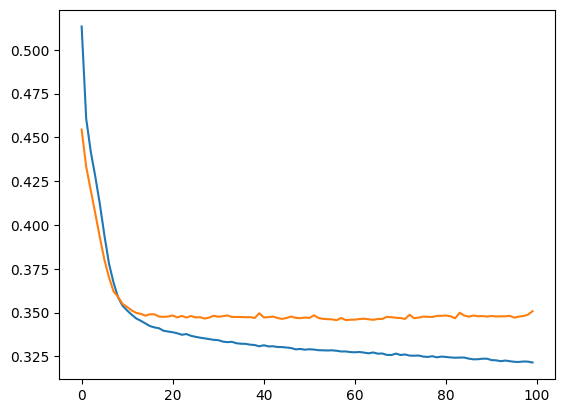

In [130]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

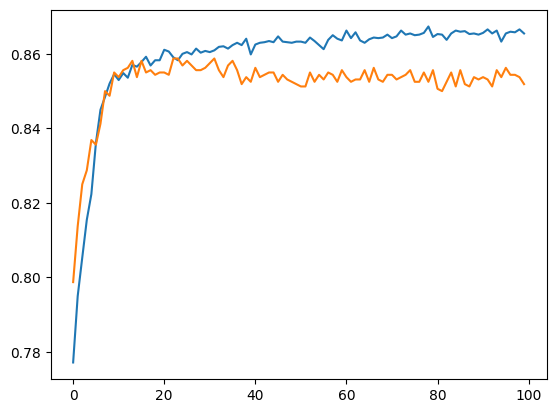

In [135]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])